<a href="https://colab.research.google.com/github/suvankit/Speech-emotion-recognition/blob/main/SER_Minor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong).

NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [ ]:
filename='/content/gdrive/MyDrive/archive/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

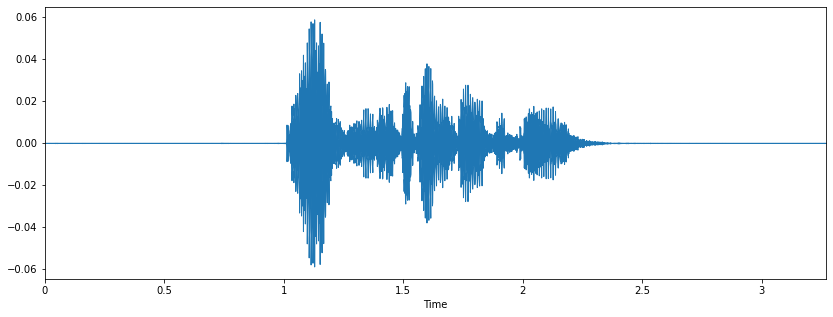

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

in audio sample rate defines how many times per second a sound is sampled

In [ ]:
sample_rate

22050

In [ ]:
data

array([ 2.2051008e-05,  1.6838792e-05,  3.5639907e-05, ...,
        4.5767497e-06, -1.2002213e-05,  0.0000000e+00], dtype=float32)

in librosa, we can convert any audio signal to mono channel signal. we will be able to represent audio signal to one normalised (-1,1) numpy array.

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [ ]:
wave_audio

array([ 1,  1,  0, ..., -1,  0, -1], dtype=int16)

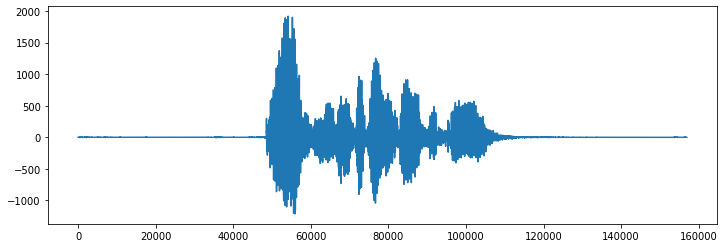

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 141)


In [ ]:
mfccs

array([[-8.4944543e+02, -8.4800372e+02, -8.4497742e+02, ...,
        -8.4869281e+02, -8.4983911e+02, -8.4829706e+02],
       [ 9.3974819e+00,  1.1429262e+01,  1.5643801e+01, ...,
         1.0440815e+01,  8.8337011e+00,  1.1016566e+01],
       [ 9.2578850e+00,  1.1268430e+01,  1.5306115e+01, ...,
         1.0239193e+01,  8.6746788e+00,  1.0861981e+01],
       ...,
       [ 1.3958716e+00,  1.0462004e+00,  3.4934726e-01, ...,
         1.5835330e+00,  7.5560451e-01,  6.1734879e-01],
       [ 1.3667076e+00,  9.9996936e-01,  3.0657363e-01, ...,
         1.5110283e+00,  7.8714561e-01,  6.2440288e-01],
       [ 1.3092601e+00,  9.1002083e-01,  2.6212227e-01, ...,
         1.3886886e+00,  8.0997914e-01,  5.9850895e-01]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/gdrive/MyDrive/archive/Ravdess/audio_speech_actors_01-24'
metadata=pd.read_csv('/content/sample_data/data_path4.csv')
metadata.head()

,Emotions,Path
0,angry,/content/gdrive/MyDrive/archive/Ravdess/audio_...
1,calm,/content/gdrive/MyDrive/archive/Ravdess/audio_...
2,sad,/content/gdrive/MyDrive/archive/Ravdess/audio_...
3,happy,/content/gdrive/MyDrive/archive/Ravdess/audio_...
4,angry,/content/gdrive/MyDrive/archive/Ravdess/audio_...


MFCC 

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np

extracted_features=[]
for file_name,emotion in zip(metadata.Path,metadata.Emotions):
  #final_class_labels=metadata["Emotions"]
  final_class_labels=emotion
  data=features_extractor(file_name)
  extracted_features.append([data,final_class_labels])

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-578.64954, 46.95361, -13.815475, 5.2773423, ...",angry
1,"[-681.8122, 52.998253, -6.1178136, 10.157554, ...",calm
2,"[-631.98627, 48.792835, -12.924452, 3.8327184,...",sad
3,"[-653.81354, 53.069748, -20.63017, 4.0010037, ...",happy
4,"[-481.2786, 37.051075, -21.054392, 5.1613617, ...",angry


In [ ]:
extracted_features_df.shape

(1440, 2)

In [ ]:
#normalised mfccs coefficients
#angry
extracted_features_df['feature'].iloc[0]

array([-5.7864954e+02,  4.6953609e+01, -1.3815475e+01,  5.2773423e+00,
       -8.2462378e+00, -2.3087516e+00, -1.4576646e+01, -4.8934221e+00,
       -1.6537270e+01,  2.2198617e+00, -6.4015074e+00, -6.3476892e+00,
       -2.9086041e+00, -4.2423735e+00, -4.6104774e+00, -4.2967162e+00,
       -6.2513452e+00, -4.4381422e-01, -5.8517075e+00, -2.8418622e+00,
       -3.5885525e+00, -1.2759197e+00, -2.2765138e+00,  2.3008113e+00,
       -2.9461104e-01,  1.2751029e+00, -2.3878908e-01,  2.1529579e+00,
        1.2784668e+00,  4.4306159e+00,  2.4343343e+00,  1.5517074e+00,
        7.2986946e-02, -1.7795229e-01, -5.0830752e-01,  2.5523949e+00,
        3.1576996e+00,  3.2538075e+00,  2.3639824e+00,  1.5502224e+00],
      dtype=float32)

In [ ]:
#sad
extracted_features_df['feature'].iloc[2]

array([-6.3198627e+02,  4.8792835e+01, -1.2924452e+01,  3.8327184e+00,
       -4.0159712e+00,  1.6473728e+00, -1.4982361e+01, -1.2664606e+01,
       -1.6746666e+01,  5.2176614e+00, -6.0675011e+00, -6.0840549e+00,
       -4.2760696e+00, -7.6455700e-01, -6.2543955e+00, -4.9800596e+00,
       -4.2877054e+00, -2.3096833e+00, -5.6569381e+00, -2.7587490e+00,
       -3.7917542e+00, -2.2737608e+00, -5.9254317e+00, -1.9760375e+00,
       -5.9257889e+00, -7.5265425e-01,  9.0232221e-03,  3.5785334e+00,
        4.0415225e+00,  5.1306515e+00,  1.7765219e+00,  5.0279707e-01,
       -1.0188954e-01,  5.5361214e+00,  8.5235662e+00,  9.6740828e+00,
        8.3735685e+00,  5.9649272e+00,  8.7305242e-01,  1.6549257e+00],
      dtype=float32)

In [ ]:
#happy
extracted_features_df['feature'].iloc[3]

array([-6.5381354e+02,  5.3069748e+01, -2.0630171e+01,  4.0010037e+00,
       -9.7349966e-01, -3.2498786e+00, -1.5724890e+01, -7.4347439e+00,
       -1.4817409e+01,  3.0036776e+00, -9.8580093e+00, -4.5374122e+00,
       -4.8303347e+00, -8.2314366e-01, -2.1845608e+00, -5.4170070e+00,
       -7.5605273e+00, -1.3559480e+00, -5.4248843e+00, -3.5150621e+00,
       -5.4435048e+00, -8.5045731e-01, -2.7049994e+00,  5.3080497e+00,
       -1.9840850e-01,  3.3643224e+00, -1.2917312e+00, -1.3271157e+00,
       -9.6378958e-01,  3.2932904e+00,  3.8396487e+00,  3.0843461e+00,
       -1.6559359e-01,  1.2958450e+00,  1.4087449e+00,  4.9671836e+00,
        4.4604988e+00,  3.2881432e+00,  1.3910797e+00,  3.5577540e+00],
      dtype=float32)

In [ ]:
extracted_features_df['class'].iloc[605]

'sad'

In [ ]:
extracted_features_df['feature'].iloc[605]

array([-7.11354858e+02,  5.25587921e+01,  3.39899373e+00,  2.10470142e+01,
       -9.91223049e+00, -1.03213340e-01, -1.27980604e+01, -3.65152764e+00,
       -8.24224663e+00, -1.97144914e+00, -5.45479965e+00, -1.21536635e-01,
       -5.21616745e+00,  1.11424029e+00, -3.23089027e+00, -3.46907228e-01,
       -4.70593166e+00,  1.51151717e+00, -4.53834438e+00,  1.69997883e+00,
       -1.15296936e+00,  1.19541943e+00,  1.43957973e+00,  9.80014503e-01,
       -1.36785352e+00,  1.62283289e+00, -4.51111406e-01,  1.55242503e+00,
       -3.89792413e-01,  1.48124862e+00,  7.32645154e-01,  3.59190178e+00,
        2.10174680e+00,  4.22568035e+00,  2.41339684e+00,  4.17009830e+00,
        1.94002402e+00,  3.22167546e-01, -8.51419345e-02,  5.59794724e-01],
      dtype=float32)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(1440, 40)

In [ ]:
y


array(['angry', 'calm', 'sad', ..., 'disgust', 'surprise', 'surprise'],
      dtype='<U8')

# Machine Learning Classification

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encode=preprocessing.LabelEncoder()
yy=label_encode.fit_transform(extracted_features_df['class'])
np.unique(yy)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,yy,test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(1080, 40)

In [ ]:
y_train

array([3, 5, 3, ..., 5, 6, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
print("{}--> Mean acc-->{}".format(DecisionTreeClassifier,cross_val_score(DecisionTreeClassifier(),X,yy,cv=15,scoring='accuracy').mean()))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>--> Mean acc-->0.3013888888888889


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
et = ExtraTreesClassifier()
rf = RandomForestClassifier()
dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Extra Tree',6:'Random Forest'}
models=[logreg,dt ,knn ,svc ,nb ,et ,rf ]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
for i,model in enumerate(models):
  print("{}--> Mean Accuracy--> {}".format(dict[i],cross_val_score(model,X,yy,cv=15,scoring='accuracy').mean()))

Logistic Regression--> Mean Accuracy--> 0.3611111111111111
Decision Tree--> Mean Accuracy--> 0.3118055555555556
KNN--> Mean Accuracy--> 0.33819444444444446
SVC--> Mean Accuracy--> 0.2972222222222222
Naive Bayes--> Mean Accuracy--> 0.21249999999999997
Extra Tree--> Mean Accuracy--> 0.4631944444444444
Random Forest--> Mean Accuracy--> 0.4437499999999999


In [ ]:
classifier=ExtraTreesClassifier()
classifier.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6305555555555555

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[31,  2,  4,  1,  1,  0,  2, 10],
       [ 0, 46,  2,  0,  2,  1,  1,  0],
       [ 3,  4, 29,  1,  2,  2,  2,  5],
       [ 2,  3,  3, 28,  4,  0,  7,  1],
       [ 2,  1,  1,  3, 21,  0,  3,  7],
       [ 0, 11,  1,  1,  1, 10,  1,  1],
       [ 0,  5,  3,  2,  5,  0, 28,  1],
       [ 3,  3,  9,  1,  3,  0,  0, 34]])

In [ ]:
from sklearn.metrics import classification_report
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.61      0.67        51
           1       0.61      0.88      0.72        52
           2       0.56      0.60      0.58        48
           3       0.76      0.58      0.66        48
           4       0.54      0.55      0.55        38
           5       0.77      0.38      0.51        26
           6       0.64      0.64      0.64        44
           7       0.58      0.64      0.61        53

    accuracy                           0.63       360
   macro avg       0.65      0.61      0.62       360
weighted avg       0.65      0.63      0.63       360



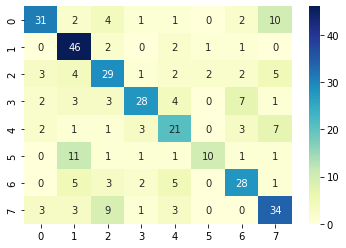

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

# ANN

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
yyy=to_categorical(labelencoder.fit_transform(y))

In [ ]:
yyy

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
x_train,x_test,yyy_train,yyy_test=train_test_split(X,yyy,test_size=0.2,random_state=0)


In [ ]:
x_train.shape

(1152, 40)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=yyy.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, yyy_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, yyy_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
28/36 [======================>.......] - ETA: 0s - loss: 66.7824 - accuracy: 0.1261
Epoch 00001: val_loss improved from inf to 2.79990, saving model to saved_models/audio_classification.hdf5
36/36 [==============================] - 1s 11ms/step - loss: 59.1539 - accuracy: 0.1276 - val_loss: 2.7999 - val_accuracy: 0.1458
Epoch 2/500
19/36 [==============>...............] - ETA: 0s - loss: 25.0615 - accuracy: 0.1398
Epoch 00002: val_loss improved from 2.79990 to 2.23446, saving model to saved_models/audio_classification.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 21.5959 - accuracy: 0.1432 - val_loss: 2.2345 - val_accuracy: 0.1181
Epoch 3/500
20/36 [===============>..............] - ETA: 0s - loss: 12.5260 - accuracy: 0.1422
Epoch 00003: val_loss improved from 2.23446 to 2.07846, saving model to saved_models/audio_classification.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 11.0804 - accuracy: 0.1267 - val_loss: 2.0785 - val_accuracy:

In [ ]:
test_accuracy=model.evaluate(x_test,yyy_test,verbose=0)
print(test_accuracy[1])

0.1076388880610466


# MLP

Multi Layer Perceptron Classifier, it optimizes the log-loss function using stochastic gradient descent. The MLPClassifier has an internal neural network for the purpose of classification. This is a feedforward ANN model.

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
model1 = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, 
                      hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
y_train

array([3, 5, 3, ..., 5, 6, 1])

In [ ]:
model1.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
predictions = model1.predict(X_test)

In [ ]:
predictions

array([4, 0, 2, 0, 0, 5, 1, 6, 2, 0, 1, 2, 2, 2, 1, 5, 2, 3, 1, 4, 4, 1,
       7, 4, 7, 2, 2, 4, 5, 2, 2, 4, 4, 4, 5, 7, 4, 6, 2, 2, 0, 4, 0, 2,
       1, 4, 2, 4, 6, 6, 2, 2, 5, 4, 2, 2, 2, 6, 2, 2, 2, 4, 5, 1, 7, 1,
       4, 2, 1, 3, 4, 3, 2, 2, 4, 4, 1, 3, 2, 5, 2, 1, 2, 4, 2, 1, 5, 2,
       4, 4, 2, 6, 2, 4, 2, 3, 2, 2, 1, 3, 1, 2, 2, 5, 2, 4, 2, 3, 2, 0,
       5, 3, 3, 2, 1, 2, 2, 5, 2, 4, 2, 4, 1, 3, 7, 2, 2, 0, 3, 6, 3, 4,
       4, 1, 4, 3, 2, 4, 7, 2, 2, 4, 4, 4, 5, 2, 3, 4, 4, 4, 0, 7, 0, 4,
       7, 3, 4, 2, 2, 5, 7, 2, 2, 1, 2, 7, 1, 4, 2, 1, 2, 2, 1, 4, 4, 3,
       2, 2, 4, 4, 2, 3, 4, 6, 5, 2, 4, 2, 1, 4, 2, 7, 2, 0, 3, 2, 2, 2,
       6, 0, 5, 2, 5, 2, 4, 1, 2, 7, 5, 1, 4, 5, 5, 2, 4, 4, 2, 1, 0, 2,
       1, 2, 5, 1, 4, 5, 2, 4, 4, 2, 5, 3, 0, 5, 4, 1, 4, 7, 2, 1, 2, 4,
       7, 6, 4, 4, 1, 4, 1, 2, 2, 2, 4, 4, 2, 2, 4, 2, 7, 2, 2, 4, 2, 2,
       5, 0, 4, 5, 4, 4, 4, 2, 4, 1, 4, 2, 0, 2, 1, 2, 2, 2, 5, 2, 4, 0,
       2, 5, 2, 1, 4, 6, 0, 2, 1, 7, 7, 6, 4, 2, 2,

In [ ]:
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 38.89%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        51
           1       0.51      0.40      0.45        52
           2       0.29      0.73      0.41        48
           3       0.68      0.35      0.47        48
           4       0.23      0.50      0.31        38
           5       0.21      0.27      0.24        26
           6       0.62      0.18      0.28        44
           7       0.62      0.25      0.35        53

    accuracy                           0.39       360
   macro avg       0.51      0.38      0.38       360
weighted avg       0.54      0.39      0.40       360



# CNN

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 40, 256)           1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 20, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 20, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 5, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, yyy_train, batch_size=64, epochs=50, validation_data=(x_test, yyy_test), callbacks=[rlrp])

Epoch 1/50
18/18 [==============================] - 4s 164ms/step - loss: 5.5689 - accuracy: 0.1363 - val_loss: 2.0788 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 3s 149ms/step - loss: 2.0818 - accuracy: 0.1259 - val_loss: 2.0784 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 3s 149ms/step - loss: 2.0767 - accuracy: 0.1224 - val_loss: 2.0778 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 3s 150ms/step - loss: 2.0788 - accuracy: 0.1328 - val_loss: 2.0773 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 3s 147ms/step - loss: 2.0765 - accuracy: 0.1345 - val_loss: 2.0768 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 3s 147ms/step - loss: 2.0773 - accuracy: 0.1311 - val_loss: 2.0763 - val_accuracy: 0.1076 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 3s 148ms/step - lo